# Sistema para exibir, manipular e salvar imagens

### *Integrantes:*
- Júlia Moraes
- Luiz Eduardo
- Pedro Miguel Cecato
- Pedro Lucas Simões
- Humberto Nunes

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<section>
  <h1>📘 Relatório Teórico – Processamento Digital de Imagens</h1>

  <h2>1. Representação de Imagens RGB (24 bits/pixel)</h2>
  <p>
    Uma imagem digital RGB é formada por três camadas de cor: <strong>vermelho (R)</strong>, <strong>verde (G)</strong> e <strong>azul (B)</strong>.
    Cada pixel contém três valores inteiros (um por canal) no intervalo <code>[0, 255]</code>.
  </p>
  <ul>
    <li>Cada canal tem <strong>8 bits</strong> (256 níveis); juntos totalizam <strong>24 bits/pixel</strong>.</li>
    <li>Exemplo de pixel: <code>(R=120, G=200, B=50)</code>.</li>
    <li>Até <strong>16,7 milhões</strong> de cores (256³).</li>
  </ul>

  <hr>

  <h2>2. Correlação Bidimensional <em>m × n</em></h2>

  <h3>2.1. Conceito</h3>
  <p>
    A <strong>correlação 2D</strong> aplica uma máscara (kernel) sobre a imagem, combinando valores de vizinhança para cada pixel.
  </p>
  <p><strong>Fórmula (por canal):</strong></p>
  <pre><code>y(i, j) =  Σ(u=0..m-1) Σ(v=0..n-1) [ x(i+u, j+v) · h(u, v) ] + bias</code></pre>
  <ul>
    <li><code>x(i, j)</code>: valor original do pixel.</li>
    <li><code>h(u, v)</code>: valor da máscara na posição <code>(u, v)</code>.</li>
    <li><code>m × n</code>: dimensões do kernel.</li>
    <li><code>bias</code>: deslocamento inteiro entre <code>-255</code> e <code>255</code> (ajusta brilho).</li>
  </ul>

  <h3>2.2. Funções de Ativação</h3>
  <ul>
    <li><strong>Identidade</strong>: <code>f(x) = x</code> (mantém o valor calculado).</li>
    <li><strong>ReLU</strong>: <code>f(x) = max(0, x)</code> (trunca valores negativos, útil para realçar bordas).</li>
  </ul>

  <h3>2.3. Filtros Utilizados</h3>
  <h4>Filtro Gaussiano 5×5</h4>
  <ul>
    <li>Suaviza a imagem (reduz ruído) com borramento <em>suave</em>.</li>
    <li>Kernel aproxima uma distribuição Gaussiana bidimensional.</li>
  </ul>

  <h4>Filtros Box (1×10, 10×1, 10×10)</h4>
  <ul>
    <li>Máscaras com valores iguais; realizam <strong>média</strong> na vizinhança.</li>
    <li><code>Box 1×10</code>: suavização horizontal; <code>Box 10×1</code>: vertical; <code>Box 10×10</code>: média em bloco grande (borramento forte).</li>
  </ul>

  <h4>Sobel Horizontal e Vertical</h4>
  <ul>
    <li>Detectam <strong>bordas</strong> (gradientes de intensidade).</li>
    <li>Sobel Horizontal realça mudanças verticais (bordas horizontais).</li>
    <li>Sobel Vertical realça mudanças horizontais (bordas verticais).</li>
  </ul>

  <div style="display:flex; gap:24px; flex-wrap:wrap; align-items:flex-start;">
    <div>
      <p><strong>Sobel Vertical (S<sub>x</sub>):</strong></p>
      <table border="1" cellpadding="6" cellspacing="0">
        <tbody>
          <tr><td>-1</td><td>0</td><td>1</td></tr>
          <tr><td>-2</td><td>0</td><td>2</td></tr>
          <tr><td>-1</td><td>0</td><td>1</td></tr>
        </tbody>
      </table>
    </div>
    <div>
      <p><strong>Sobel Horizontal (S<sub>y</sub>):</strong></p>
      <table border="1" cellpadding="6" cellspacing="0">
        <tbody>
          <tr><td>-1</td><td>-2</td><td>-1</td></tr>
          <tr><td>0</td><td>0</td><td>0</td></tr>
          <tr><td>1</td><td>2</td><td>1</td></tr>
        </tbody>
      </table>
    </div>
  </div>

  <h3>2.4. Visualização de Sobel</h3>
  <ol>
    <li>Aplicar <strong>valor absoluto</strong> à resposta (remove negativos).</li>
    <li>Aplicar <strong>expansão de histograma</strong> para <code>[0, 255]</code> (maximiza contraste das bordas).</li>
  </ol>

  <hr>

  <h2>3. Equalização de Histograma</h2>

  <h3>3.1. Conceito</h3>
  <p>
    Redistribui níveis de intensidade para melhorar o <strong>contraste</strong>. Baseia-se no histograma e na sua <strong>CDF</strong>
    (função de distribuição acumulada).
  </p>
  <p><strong>Passos:</strong></p>
  <ol>
    <li>Calcular o <strong>histograma</strong> (contagem por intensidade).</li>
    <li>Calcular a <strong>CDF</strong> (soma acumulada do histograma).</li>
    <li>Aplicar transformação:</li>
  </ol>
  <pre><code>T(r) = round( ((L - 1) / RC) * Σ(k=0..r) n_k )</code></pre>
  <ul>
    <li><code>L = 256</code> (níveis de intensidade).</li>
    <li><code>RC</code> = total de pixels (linhas × colunas).</li>
    <li><code>n_k</code> = contagem de pixels com intensidade <code>k</code>.</li>
  </ul>
  <p>Resultado: os níveis passam a ocupar melhor a faixa <code>[0, 255]</code>.</p>

  <hr>

  <h2>4. Equalização Local + Expansão de Histograma</h2>

  <h3>4.1. Por que Local?</h3>
  <p>
    Em imagens com iluminação desigual, a equalização <strong>global</strong> pode falhar. Dividir a imagem em blocos
    <strong><em>m × n</em></strong> e equalizar cada um separadamente adapta o contraste às diferentes regiões.
  </p>

  <h3>4.2. Expansão de Histograma (por bloco)</h3>
  <ol>
    <li>Obter <code>r_min</code> e <code>r_max</code> do bloco equalizado.</li>
    <li>Aplicar a expansão linear para todo o bloco:</li>
  </ol>
  <pre><code>s = ((r - r_min) / (r_max - r_min)) * 255</code></pre>
  <p>
    Isso distribui os níveis do bloco por toda a faixa <code>[0, 255]</code>, garantindo <strong>contraste máximo local</strong>.
  </p>

  <h3>4.3. Resultado</h3>
  <ul>
    <li>Regiões escuras tornam-se mais claras.</li>
    <li>Regiões claras ganham contraste.</li>
    <li>Detalhes e bordas em áreas pouco iluminadas ficam mais visíveis.</li>
  </ul>

  <hr>

  <h2>5. Observações de Implementação (Resumo dos Requisitos)</h2>
  <ul>
    <li>Abrir, exibir, manipular e salvar imagens RGB (24 bits/pixel, 8 bits por canal).</li>
    <li>Correlação 2D <em>m × n</em> com <strong>bias</strong> (−255 a 255) e ativação (<strong>Identidade</strong> ou <strong>ReLU</strong>).</li>
    <li>Leitura de <strong>filtros</strong> a partir de arquivo <code>.txt</code> (máscara, bias, ativação).</li>
    <li>Testes com: <strong>Gaussiano 5×5</strong>, <strong>Box 1×10</strong>, <strong>Box 10×1</strong>, <strong>Box 10×10</strong>, <strong>Sobel Horizontal</strong>, <strong>Sobel Vertical</strong>.</li>
    <li>Para Sobel: aplicar <strong>|valor|</strong> + <strong>expansão de histograma para [0,255]</strong>.</li>
    <li>Equalização seguida de <strong>expansão de histograma local</strong> (janela <em>m × n</em>) em cada canal R, G e B.</li>
  </ul>
</section>

In [3]:
def extrair_pixels_rgb(caminho_imagem):
    img = Image.open(caminho_imagem) # image.open pega em BGR
    img = img.convert('RGB')
    pixels = np.array(img, dtype=np.uint8)
    return pixels

In [4]:
def exibir_imagem(imagem, titulo="Imagem"):
    plt.figure(figsize=(10, 8))
    plt.imshow(imagem)
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
def salvar_imagem(imagem_array, caminho_saida):
    """
    Salva um array NumPy como imagem RGB em disco.
    """
    img = Image.fromarray(imagem_array, 'RGB')
    img.save(caminho_saida)

In [7]:
def ler_filtro(arquivo):
    with open(arquivo, 'r') as f:
        linhas = f.readlines() # lendo as linhas
    mascara = [] # guardar a máscara
    bias = 0 #inicializa com zero
    ativacao = 'identidade' #default
    for linha in linhas:
        if linha.startswith('mascara:'): 
            continue
        elif linha.startswith('bias:'): 
            bias = int(linha.split(':')[1].strip())
        elif linha.startswith('ativacao:'):
            ativacao = linha.split(':')[1].strip().lower()
        elif linha.strip():
            mascara.append([float(x) for x in linha.strip().split()]) #pega a mascara no final e salva todos os valores
    print(mascara)
    return np.array(mascara), bias, ativacao

def ativacao_relu(x):
    return np.maximum(0, x)

def ativacao_identidade(x):
    return x

In [8]:
def correlacao_manual(imagem, mascara, bias, ativacao, clip=False):
    # imagem: array (coluna, linha, 3)
    # mascara: array (m, n)
    linha, coluna , canais = imagem.shape
    m, n = mascara.shape
    resultado = np.zeros_like(imagem, dtype=np.int32) #inicializar
    
    for canal in range(canais):
        for i in range(linha - m + 1): # pegar o número certo de linhas, # só percorre onde a mascara cabe na linha
            for j in range(coluna - n + 1): # mesma lógica de linnhas
        
                regiao = imagem[i:i+m, j:j+n, canal] # vetor de 3 
                valor = np.sum(regiao * mascara) + bias # produto interno mascara
                if ativacao == 'relu':
                    resultado[i, j, canal] = ativacao_relu(valor)
                else:
                    resultado[i, j, canal] = ativacao_identidade(valor)

    if clip: # deixar os valores menores que 0 em 0 e maiores que 255 em 255
        resultado = np.clip(resultado, 0, 255).astype(np.uint8) 
        return resultado
    return resultado

In [9]:
#chamar passando uma imagem que ja tenha passado por um filtro
def visualizar_sobel(img_sobel):
    
    #valor absoluto
    img_abs = np.abs(img_sobel)

    #expansão de histograma
    r_min = np.min(img_abs)
    r_max = np.max(img_abs)

    if r_max > r_min:
        img_expandida = ((img_abs - r_min) / (r_max - r_min) * 255)
    else:
        img_expandida = img_abs  # caso onde todos os valores são iguais

    return img_expandida.astype(np.uint8)

In [10]:
def equalizacao_global(imagem):
    """
    Aplica equalização de histograma usando a fórmula:
    T(r) = round( (L-1) / (RC) × Σ nₗ )
    
    Onde:
    L = 256 (níveis de intensidade)
    RC = número total de pixels (linhas × colunas)
    Σ nₗ = soma acumulada das frequências (CDF)
    """
    # Níveis de intensidade
    L = 256
    
    if len(imagem.shape) == 3:
        # Para imagens RGB - processa cada canal separadamente
        resultado = np.zeros_like(imagem) #inicializa em 0 com o tamanho da mensagem
        rows, cols = imagem.shape[0], imagem.shape[1]
        RC = rows * cols  # Número total de pixels
        
        for canal in range(3):
            canal_img = imagem[:, :, canal] #todas as linhas e colunas de um canal
            
            hist = [0] * L
            for i in range(rows):
                for j in range(cols):
                    valor = int(canal_img[i, j])
                    hist[valor] += 1

            cdf = [0] * L
            acumulado = 0
            for k in range(L):
                acumulado += hist[k]
                cdf[k] = acumulado
            
            # Aplica a fórmula: T(r) = round( (L-1) / RC × Σ nₗ )
            cdf = np.array(cdf)
            transformacao = np.round((L - 1) * cdf / RC).astype(np.uint8)
            
            # Aplica a transformação em todos os pixels
            resultado[:, :, canal] = transformacao[canal_img]
            
        return resultado

In [ ]:
def equalizacao_local(imagem, m=50, n=50):
    """
    Equalização local (janelas deslizantes).
    Para cada pixel, pega vizinhança m×n centrada nele,
    equaliza e aplica só no pixel.
    """
    L = 256
    linhas, colunas, canais = imagem.shape
    saida = np.zeros_like(imagem, dtype=np.uint8)

    half_m = m // 2
    half_n = n // 2

    for canal in range(canais):
        for i in range(linhas):
            for j in range(colunas):
                # define limites da janela ao redor do pixel (i,j)
                i_ini = max(0, i - half_m)
                i_fim = min(linhas, i + half_m + 1)
                j_ini = max(0, j - half_n)
                j_fim = min(colunas, j + half_n + 1)

                janela = imagem[i_ini:i_fim, j_ini:j_fim, canal]

                # histograma da janela
                hist = np.bincount(janela.flatten(), minlength=L)

                # CDF
                cdf = np.cumsum(hist)
                cdf_norm = np.round((L - 1) * cdf / cdf[-1]).astype(np.uint8)

                # aplica transformação só no pixel central
                saida[i, j, canal] = cdf_norm[imagem[i, j, canal]]

    return saida

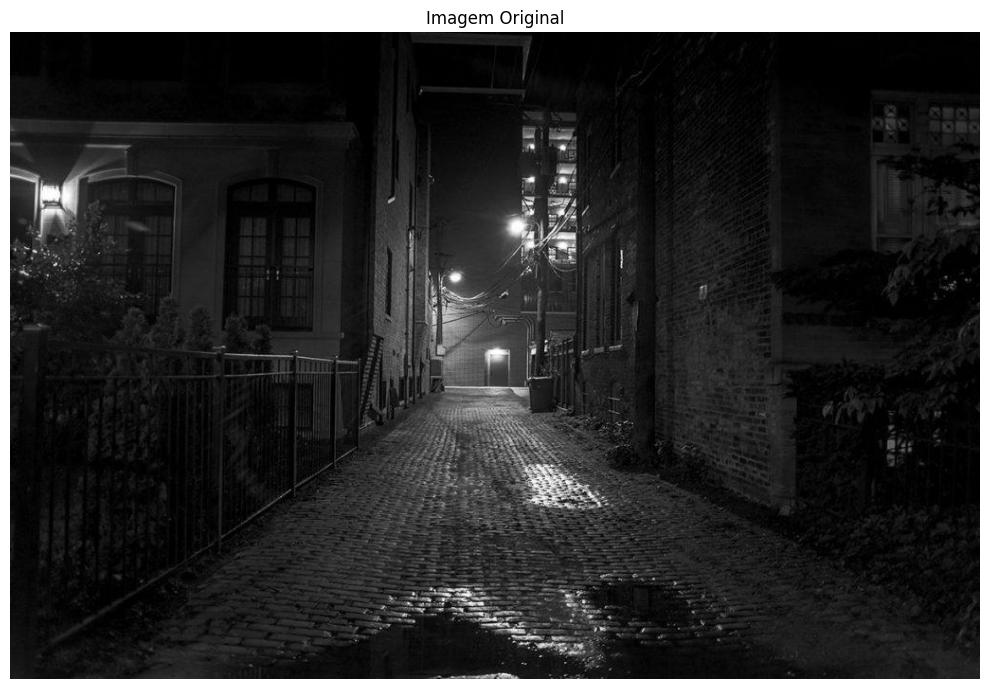

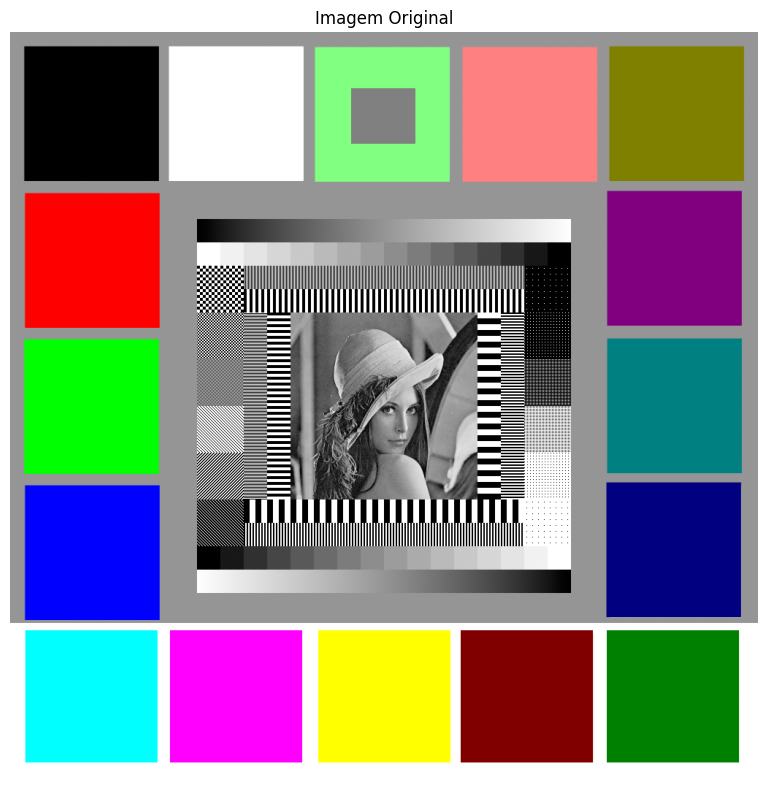

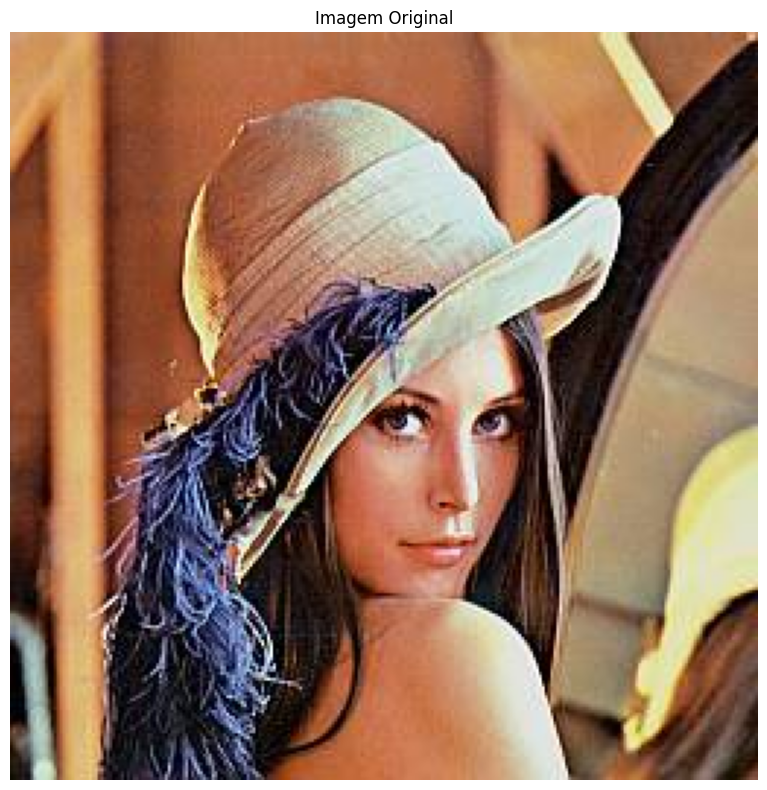

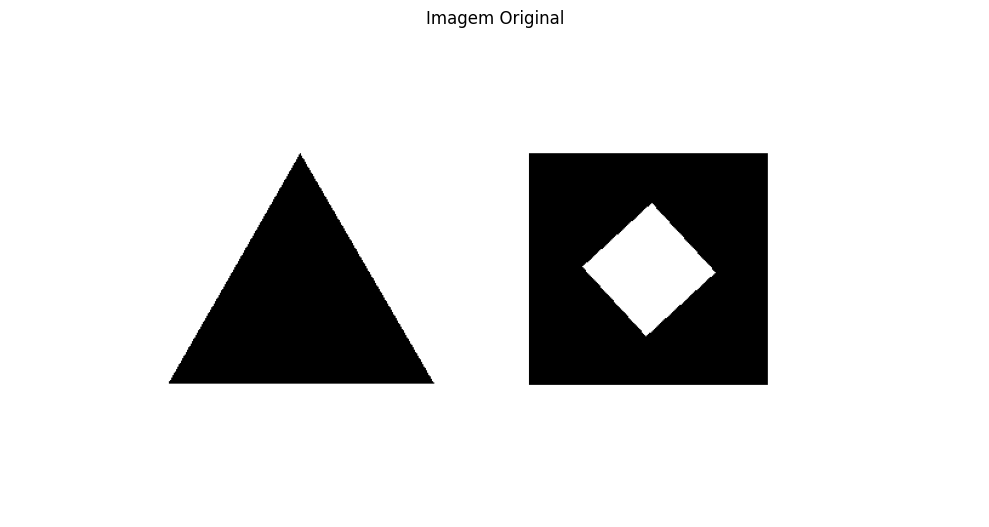

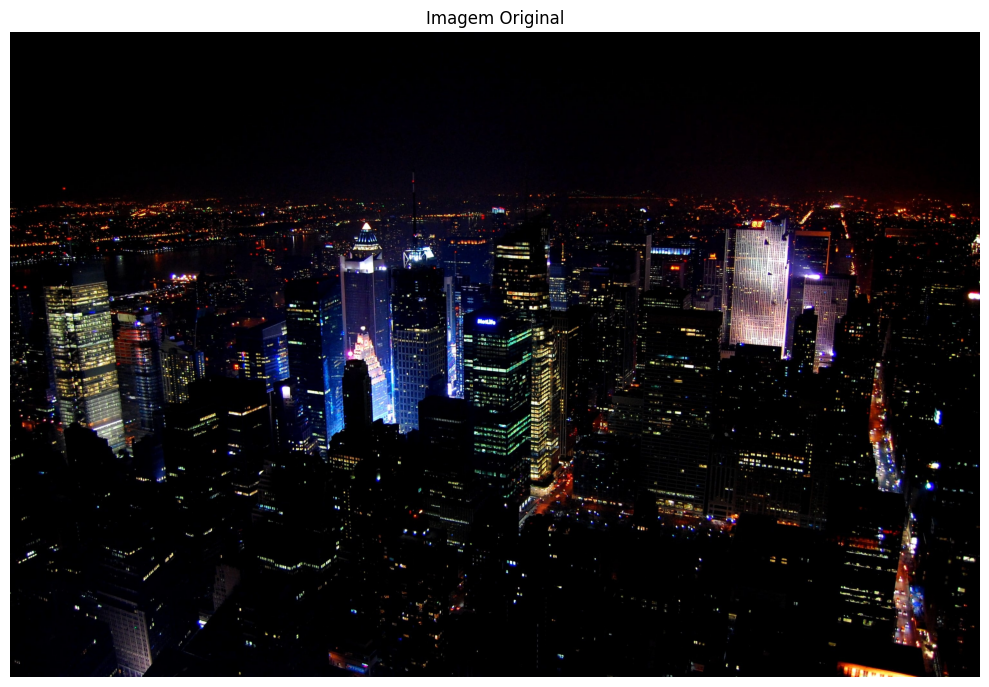

In [12]:
img_1 = extrair_pixels_rgb('../imagens/CobblestoneBrickCityAlley_byBrunoPassigatti.jpg')
img_2 = extrair_pixels_rgb('../imagens/testpat.1k.color2.jpeg.tif')
img_3 = extrair_pixels_rgb('../imagens/lena256color.jpg')
img_4 = extrair_pixels_rgb('../imagens/shapes.png')
img_5 = extrair_pixels_rgb('../imagens/citynight.jpeg')
exibir_imagem(img_1, titulo="Imagem Original")
exibir_imagem(img_2, titulo="Imagem Original")
exibir_imagem(img_3, titulo="Imagem Original")
exibir_imagem(img_4, titulo="Imagem Original")
exibir_imagem(img_5, titulo="Imagem Original")

[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]


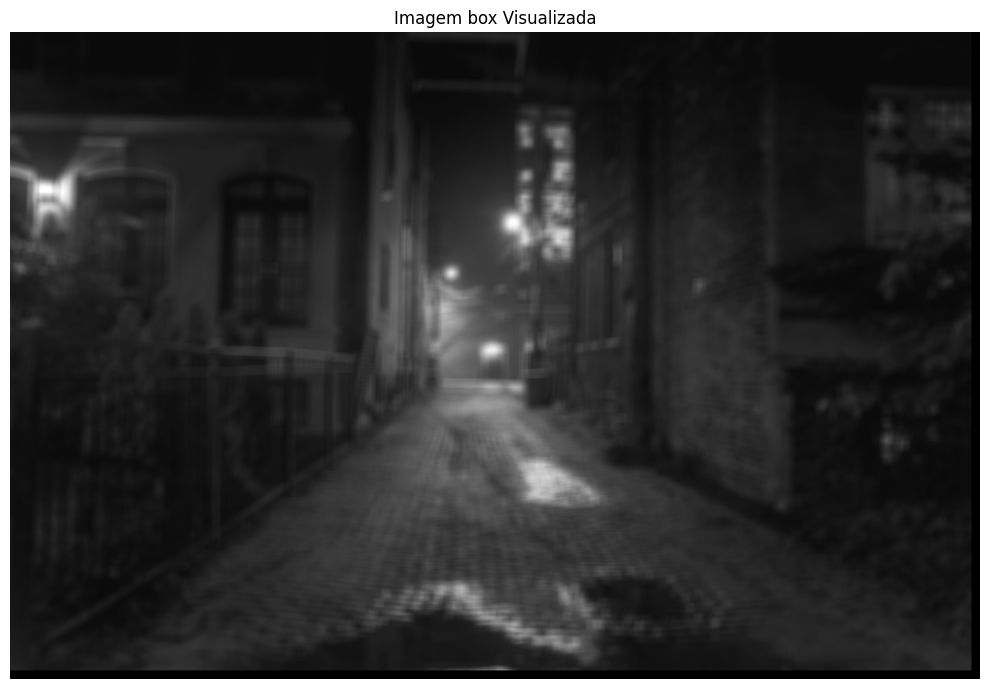

KeyboardInterrupt: 

In [13]:
mascara, bias, ativacao = ler_filtro('../filtros/box10x10.txt')
img_1_filtrada = correlacao_manual(img_1, mascara, bias, ativacao, True)
exibir_imagem(img_1_filtrada, titulo="Imagem box Visualizada")

img_2_filtrada = correlacao_manual(img_2, mascara, bias, ativacao, True)

exibir_imagem(img_2_filtrada, titulo="Imagem box Visualizada")

img_3_filtrada = correlacao_manual(img_3, mascara, bias, ativacao, True)

exibir_imagem(img_3_filtrada, titulo="Imagem box Visualizada")

img_4_filtrada = correlacao_manual(img_4, mascara, bias, ativacao, True)

exibir_imagem(img_4_filtrada, titulo="Imagem box Visualizada")

img_5_filtrada = correlacao_manual(img_5, mascara, bias, ativacao, True)

exibir_imagem(img_5_filtrada, titulo="Imagem box Visualizada")


[[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]]


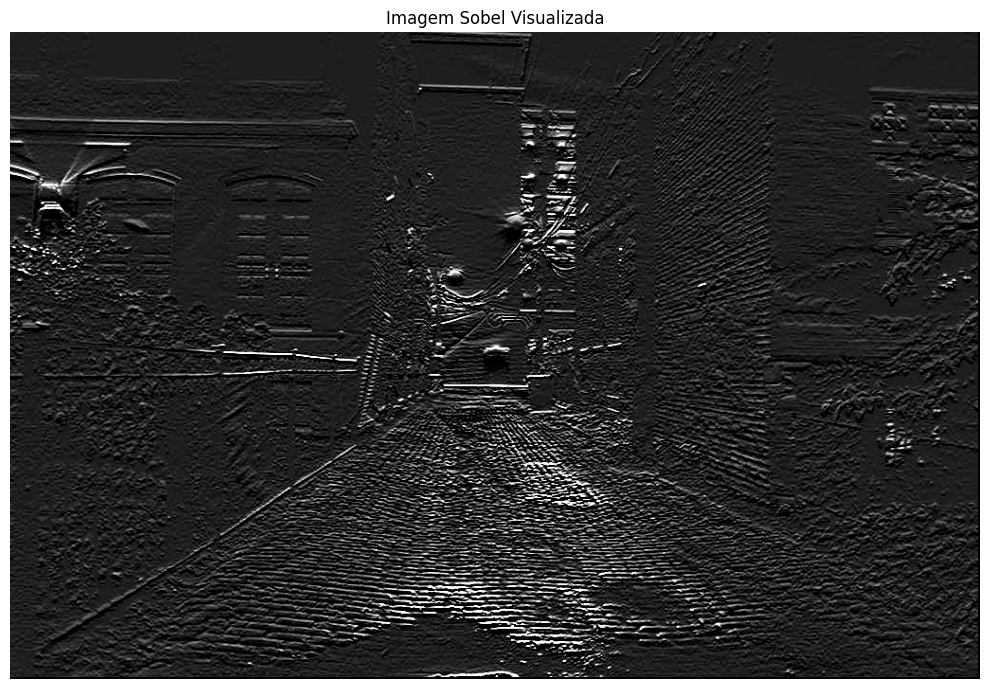

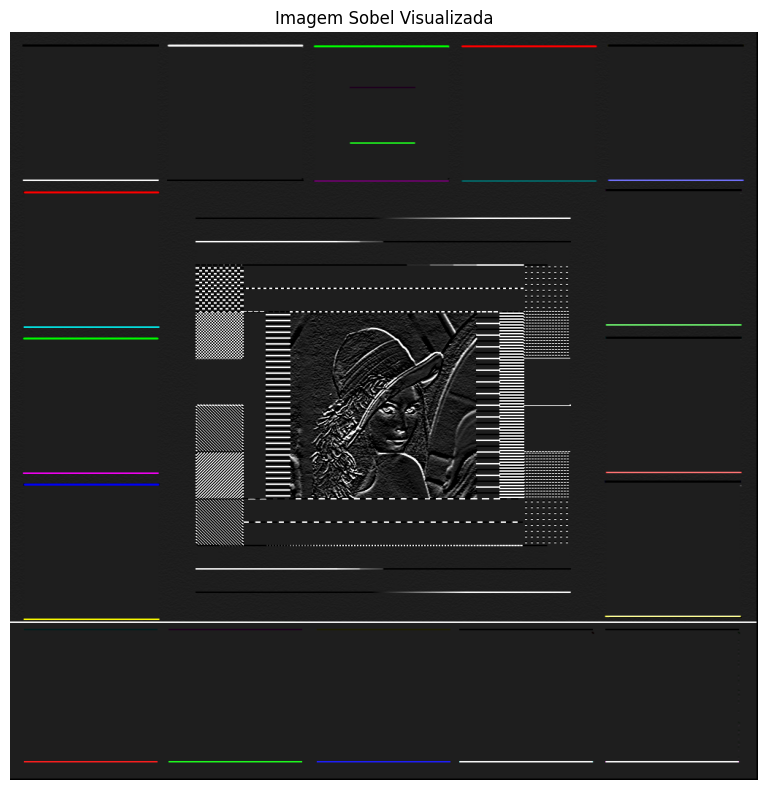

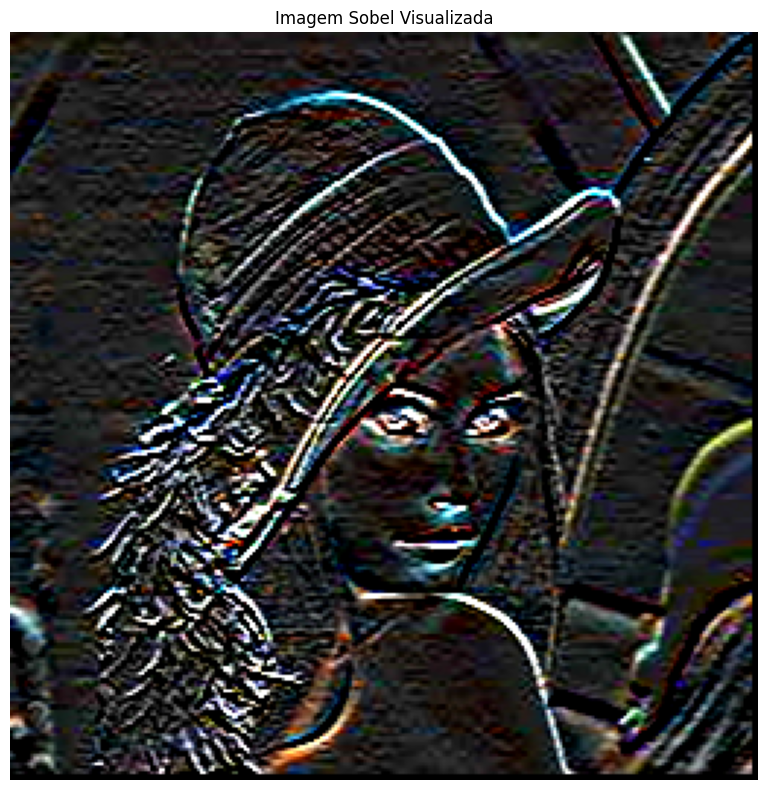

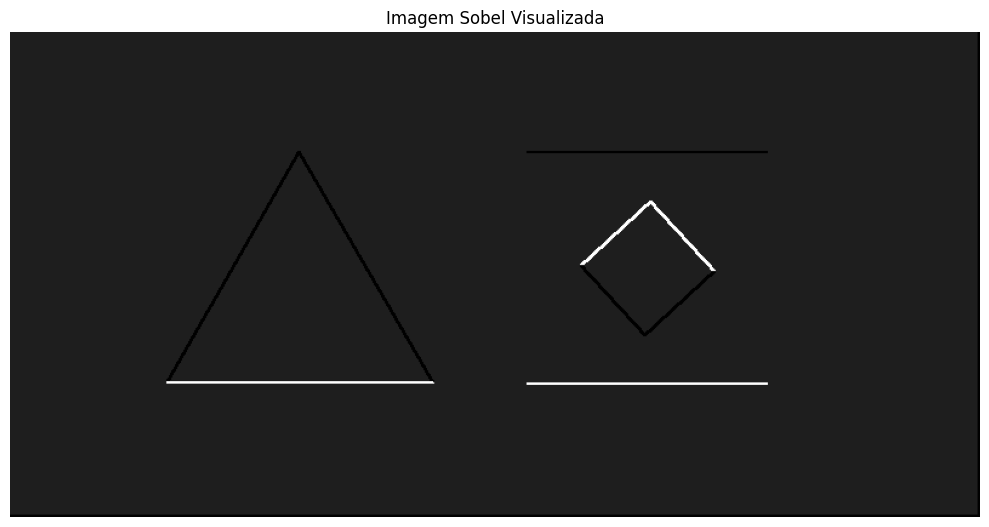

KeyboardInterrupt: 

In [76]:
mascara, bias, ativacao = ler_filtro('../filtros/sobel_h.txt')
img_1_filtrada = correlacao_manual(img_1, mascara, bias, ativacao, True)
img_1_sobel = visualizar_sobel(img_1_filtrada)
exibir_imagem(img_1_sobel, titulo="Imagem Sobel Visualizada")


img_2_filtrada = correlacao_manual(img_2, mascara, bias, ativacao, True)
img_2_sobel = visualizar_sobel(img_2_filtrada)
exibir_imagem(img_2_sobel, titulo="Imagem Sobel Visualizada")

img_3_filtrada = correlacao_manual(img_3, mascara, bias, ativacao, True)
img_3_sobel = visualizar_sobel(img_3_filtrada)
exibir_imagem(img_3_sobel, titulo="Imagem Sobel Visualizada")

img_4_filtrada = correlacao_manual(img_4, mascara, bias, ativacao, True)
img_4_sobel = visualizar_sobel(img_4_filtrada)
exibir_imagem(img_4_sobel, titulo="Imagem Sobel Visualizada")

img_5_filtrada = correlacao_manual(img_5, mascara, bias, ativacao, True)
img_5_sobel = visualizar_sobel(img_5_filtrada)
exibir_imagem(img_5_sobel, titulo="Imagem Sobel Visualizada")


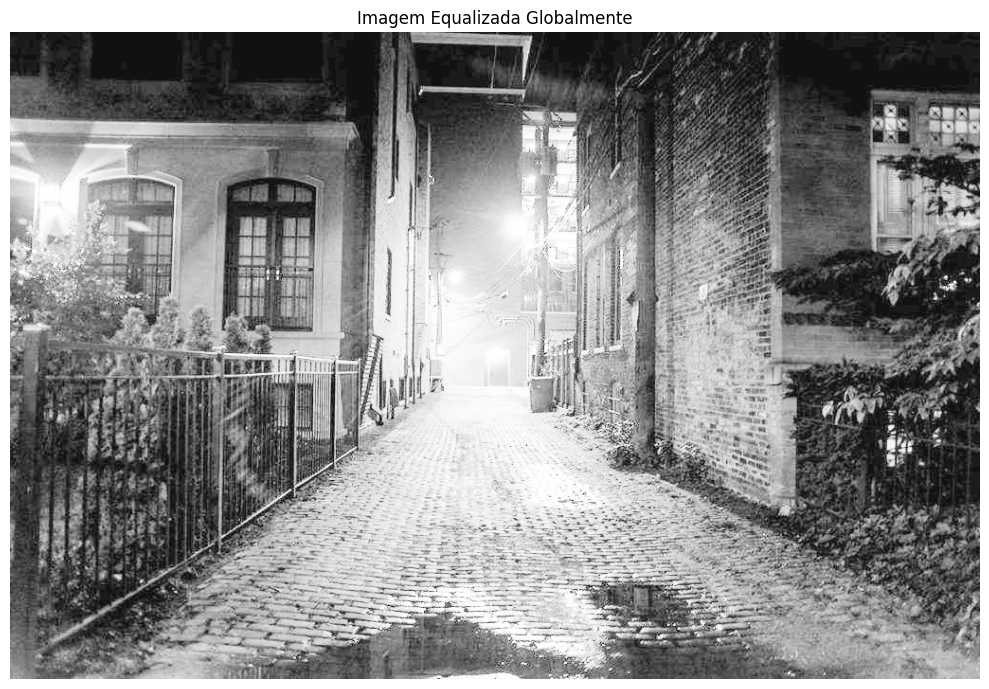

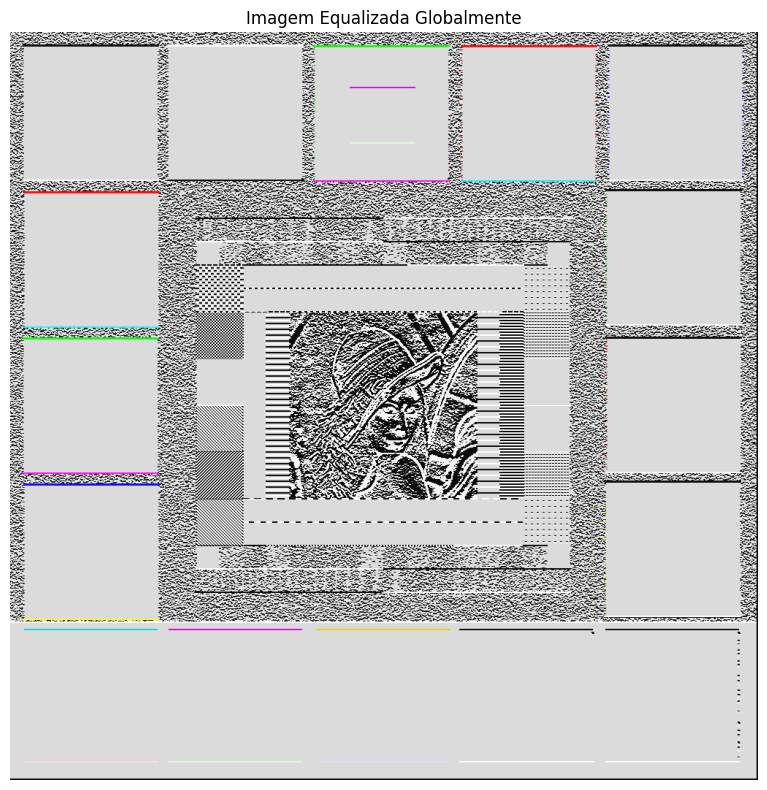

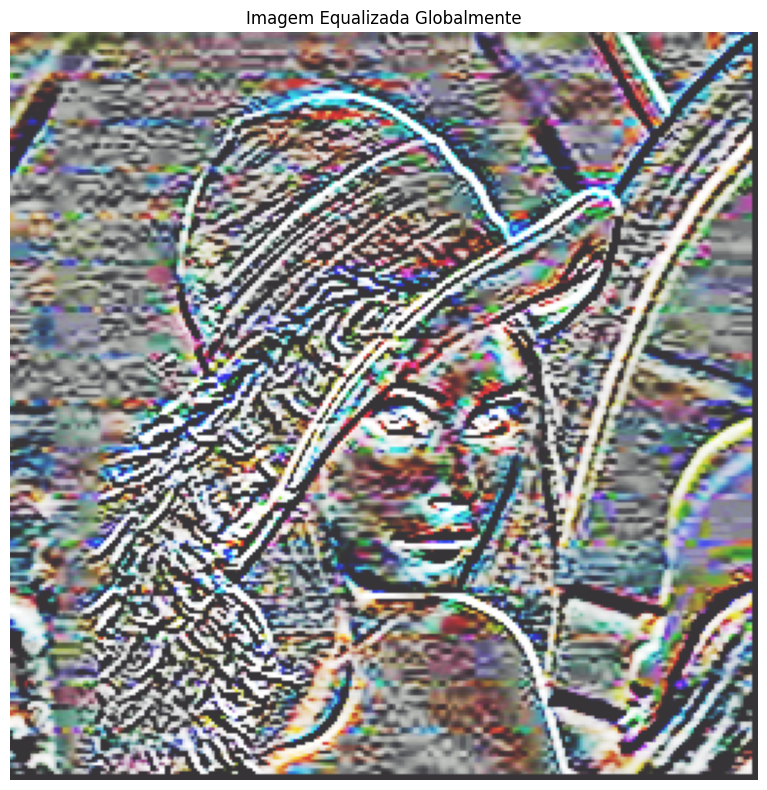

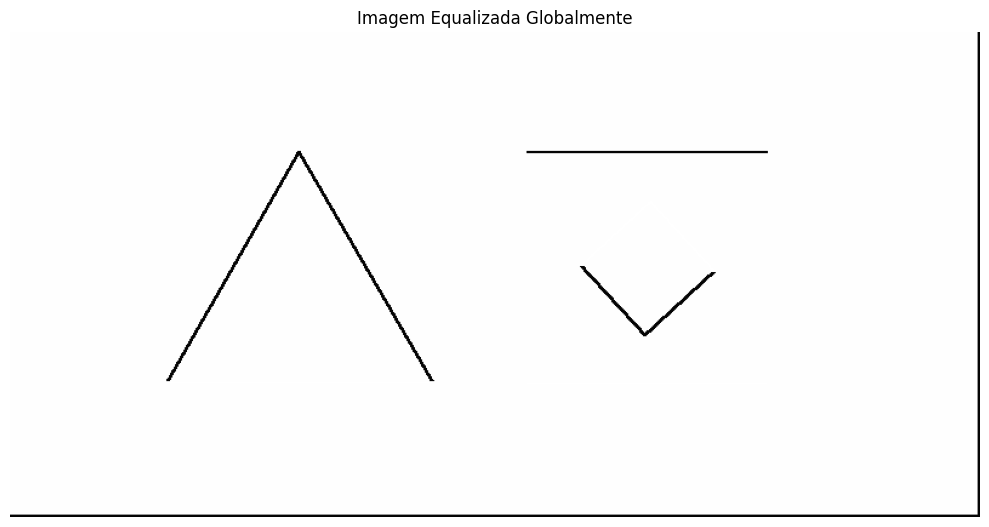

KeyboardInterrupt: 

In [93]:
img_1_eq = equalizacao_global(img_1_sobel)
exibir_imagem(img_1_eq, titulo="Imagem Equalizada Globalmente")

img_2_eq = equalizacao_global(img_2_sobel)
exibir_imagem(img_2_eq, titulo="Imagem Equalizada Globalmente")

img_3_eq = equalizacao_global(img_3_sobel)
exibir_imagem(img_3_eq, titulo="Imagem Equalizada Globalmente")

img_4_eq = equalizacao_global(img_4_sobel)
exibir_imagem(img_4_eq, titulo="Imagem Equalizada Globalmente")

img_5_eq = equalizacao_global(img_5_sobel)
exibir_imagem(img_5_eq, titulo="Imagem Equalizada Globalmente")

In [14]:
img_1_eq_bloco = equalizacao_local(img_1)
exibir_imagem(img_1_eq_bloco, titulo="Imagem Equalizada por Bloco")

img_2_eq_bloco = equalizacao_local(img_2)
exibir_imagem(img_2_eq_bloco, titulo="Imagem Equalizada por Bloco")

img_3_eq_bloco = equalizacao_por_bloco(img_3_filtrada)
exibir_imagem(img_3_eq_bloco, titulo="Imagem Equalizada por Bloco")

img_4_eq_bloco = equalizacao_por_bloco(img_4)
exibir_imagem(img_4_eq_bloco, titulo="Imagem Equalizada por Bloco")

img_5_eq_bloco = equalizacao_por_bloco(img_5_filtrada)
exibir_imagem(img_5_eq_bloco, titulo="Imagem Equalizada por Bloco")

KeyboardInterrupt: 

In [ ]:
img_2_eq_bloco = equalizacao_local(img_2)
exibir_imagem(img_2_eq_bloco, titulo="Imagem Equalizada por Bloco")